In [1]:
#Importing the neceessary libararies.
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
dataset = pd.read_pickle('df_FinalDataset.csv')

In [3]:
dataset.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporas

In [4]:
# Defining columns to be removed.
remove_these_columns = ['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'AttendingPhysician',
                        'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
                        'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
                        'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
                        'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
                        'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
                        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
                        'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
                        ]

In [5]:
# Removing unnecessary columns.
Train_category_removed = dataset.drop(axis=0, columns=remove_these_columns)

In [6]:
# Convert 'Is_Alive?' to 1 and 0.
# Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [7]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County']]


In [8]:
X_df

,InscClaimAmtReimbursed,OPAnnualDeductibleAmt,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,State,County
0,7000,70,0,0,60,39,230
1,50,200,2136,0,450,39,310
2,19000,20,1068,0,100,39,230
3,17000,540,1068,0,1050,39,600
4,13000,160,2136,0,450,39,280
...,...,...,...,...,...,...,...
558206,440,120,0,0,890,23,400
558207,440,220,0,0,570,25,150
558208,440,170,0,0,570,5,200
558209,10,350,0,0,640,16,490


In [9]:
Y_df = Train_category_removed['PotentialFraud']

In [10]:
Y_df

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
558206     No
558207     No
558208     No
558209     No
558210     No
Name: PotentialFraud, Length: 558211, dtype: object

In [11]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [12]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [13]:
# Create a Logistic Regression model with increased max_iter
logistic_classifier = LogisticRegression(random_state=69, max_iter=1000)

In [14]:
# Define hyperparameters for Grid Search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

In [15]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [16]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000, random_state=69),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='f1')

In [17]:
# Get the best parameters
best_params = grid_search.best_params_

In [18]:
# Use the best parameters to create a new model
best_logistic_classifier = LogisticRegression(**best_params, random_state=69, max_iter=500)

In [19]:
# Fit the new model
best_logistic_classifier.fit(X_train, Y_train)

LogisticRegression(C=0.001, max_iter=500, random_state=69)

In [20]:
# Predict on the test set
y_pred = best_logistic_classifier.predict(X_test)

In [21]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [22]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy * 100, 2))
print("F1 Score:", round(f1 * 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}

Accuracy: 62.49
F1 Score: 10.75

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.97      0.76    103529
           1       0.59      0.06      0.11     63935

    accuracy                           0.62    167464
   macro avg       0.61      0.52      0.44    167464
weighted avg       0.61      0.62      0.51    167464


Confusion Matrix:
 [[100866   2663]
 [ 60153   3782]]


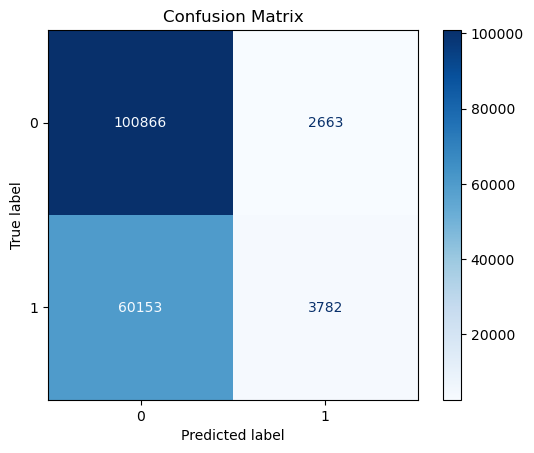

In [23]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_logistic_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()

In [24]:
#---Adding Feature Engineering features---

In [25]:
# Convert 'Dead_Alive' to 1 and 0
Train_category_removed['Dead_Alive'].replace(['Yes', 'No'], [1, 0], inplace=True)

In [26]:
# Define features (X) and target variable (Y)
X_df = Train_category_removed[['InscClaimAmtReimbursed','Claim_Duration', 'Att_Phy_tot_claims', 'OPAnnualDeductibleAmt',
                               'IPAnnualDeductibleAmt', 'IPAnnualReimbursementAmt', 
                               'OPAnnualReimbursementAmt', 'State', 'County', 'Dead_Alive']]

In [27]:
X_df

,InscClaimAmtReimbursed,Claim_Duration,Att_Phy_tot_claims,OPAnnualDeductibleAmt,IPAnnualDeductibleAmt,IPAnnualReimbursementAmt,OPAnnualReimbursementAmt,State,County,Dead_Alive
0,7000,6,1,70,0,0,60,39,230,1
1,50,0,1,200,2136,0,450,39,310,1
2,19000,12,1,20,1068,0,100,39,230,1
3,17000,18,2,540,1068,0,1050,39,600,1
4,13000,4,3,160,2136,0,450,39,280,1
...,...,...,...,...,...,...,...,...,...,...
558206,440,2,1,120,0,0,890,23,400,1
558207,440,0,10,220,0,0,570,25,150,1
558208,440,20,1,170,0,0,570,5,200,1
558209,10,0,1,350,0,0,640,16,490,1


In [28]:
# Convert 'Yes' and 'No' to 1 and 0
Y_df.replace(['Yes', 'No'], [1, 0], inplace=True)

In [29]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_df, Y_df, test_size=0.3, random_state=101)

In [30]:
# Create a Logistic Regression model
logistic_classifier = LogisticRegression(random_state=69, max_iter=500)

In [31]:
# Define hyperparameters for Grid Search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
}

In [32]:
# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)

In [33]:
# Fit the model
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=500, random_state=69),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l2']},
             scoring='f1')

In [34]:
# Get the best parameters
best_params = grid_search.best_params_

In [35]:
# Use the best parameters to create a new model
best_logistic_classifier = LogisticRegression(**best_params, random_state=69, max_iter=500)

In [36]:
# Fit the new model
best_logistic_classifier.fit(X_train, Y_train)

LogisticRegression(C=1000, max_iter=500, random_state=69)

In [37]:
# Predict on the test set
y_pred = best_logistic_classifier.predict(X_test)

In [38]:
# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
class_rep = classification_report(Y_test, y_pred)
conf_matrix = confusion_matrix(Y_test, y_pred)

In [39]:
print("Best Hyperparameters:", best_params)
print("\nAccuracy:", round(accuracy* 100, 2))
print("F1 Score:", round(f1* 100, 2))
print("\nClassification Report:\n", class_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Best Hyperparameters: {'C': 1000, 'penalty': 'l2'}

Accuracy: 68.13
F1 Score: 39.91

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.93      0.78    103529
           1       0.71      0.28      0.40     63935

    accuracy                           0.68    167464
   macro avg       0.69      0.60      0.59    167464
weighted avg       0.69      0.68      0.64    167464


Confusion Matrix:
 [[96365  7164]
 [46208 17727]]


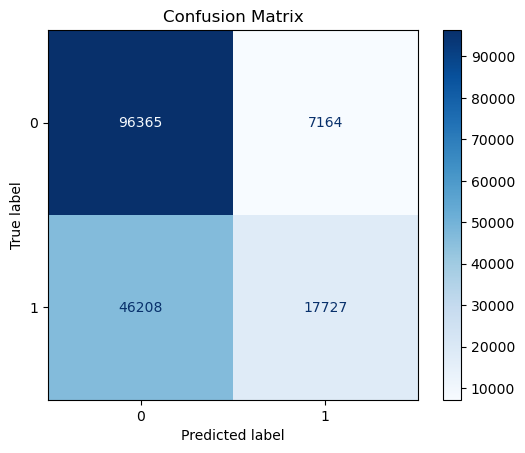

In [40]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_logistic_classifier.classes_)
disp.plot(cmap=plt.cm.Blues,values_format='d')
plt.title('Confusion Matrix')
plt.show()